<a href="https://colab.research.google.com/github/faranak5171/Data-Manipulation/blob/main/HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import random,timeit
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import whiten

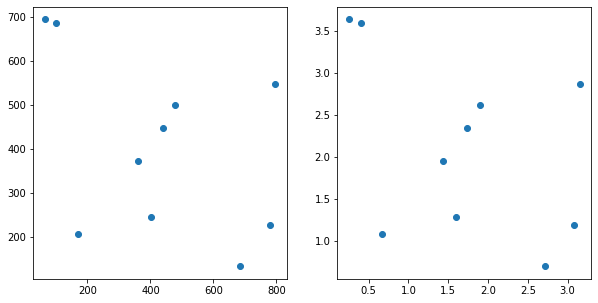

In [26]:
random.seed(1000)
x = random.sample(range(0,1000),10)
y = random.sample(range(0,1000),10)

x_scaled = whiten(x)
y_scaled = whiten(y)

fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.scatter(x,y)

fig.add_subplot(1,2,2)
plt.scatter(x_scaled, y_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


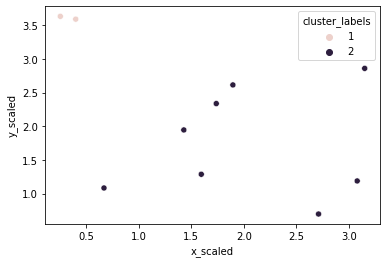

In [35]:
df = pd.DataFrame({'x_scaled': x_scaled, 'y_scaled':y_scaled})

z = linkage(df[['x_scaled','y_scaled']], method='ward', metric='euclidean')
df['cluster_labels'] = fcluster(z,2, criterion='maxclust')

sns.scatterplot('x_scaled','y_scaled', hue='cluster_labels',data=df)

In [36]:
%timeit z

31.8 ns ± 0.846 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
